In [1]:
!pip install konlpy # 코엔엘파이; 한국어 정보처리를 위한 파이썬 패키지. 
!pip install collections # 리스트, 튜플, 딕셔내리, 셋트 이외의 데이터형 구축 패키지
!pip install wordcloud #  워드 클라우딩 하는 패키지
!pip install sys # sys 모듈은 파이썬 인터프리터가 제공하는 변수와 함수를 직접 제어할 수 있게 해주는 모듈이다.

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections
ERROR: Could not find a version that satisfies the requirement sys (from versions: none)
ERROR: No matching distribution found for sys


Matplotlib에서 계속해서 폰트를 잡아주지 못했다. 
라이브러리/폰트 에 직접 넣어도 뭐고 
rcparam도 해보고 다해봤지만 잡히질 않았다. 
이거떄문에 며칠을 날렸는지;; 
테디님의 링크에서 해결 : 
https://teddylee777.github.io/visualization/matplotlib-%EC%8B%9C%EA%B0%81%ED%99%94-%ED%95%9C%EA%B8%80%ED%8F%B0%ED%8A%B8%EC%A0%81%EC%9A%A9

In [13]:
# 2폰트이슈해결 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [9]:
# 3 라이브러리 imported 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
%matplotlib inline 
import sys
from konlpy.tag import Okt
from collections import Counter  # 해시 가능한 객체를 세는 데 사용하는 딕셔너리 서브 클래스
from wordcloud import WordCloud

# 다운받은 csv를 pandas의 DataFrame 형식으로 불러옵니다.
data = pd.read_csv('train.csv', encoding='utf-8')

data

,id,document,label
0,1,영상이나 음악이 이쁘다 해도 미화시킨 불륜일뿐,0
1,2,히치콕이 이 영화를 봤다면 분명 박수를 쳤을듯...,1
2,3,괜찮은 음악영화가 또 나왔군요!!! 따뜻한 겨울이 될 것 같아요~,1
3,4,아무래도 20년도지난작품이라 지금보기는너무유치하다,0
4,5,지금까지의 영화들이 그랬듯. 이 영화역시 일본에 대한 미화는 여전하다.,0
...,...,...,...
4995,4996,좋은 배우들로 3류영화를 찍은 안타까운 영화,0
4996,4997,진짜 드럽게 재미없다 에드워드 호퍼 그림에 배경 빼고는 볼게 아닌영화,0
4997,4998,가장 실망스러운 영화.. 지금까지 본영화중..,0
4998,4999,"이런 평점 테러, 네이버에서 좀 막아야 하는 것 아닌가?",1


In [10]:
#9.데이터 필터링을 위한 마스크 설정
mask_pos = (data.label == 1)
mask_neg = (data.label == 0)

#10.전체 / 긍정 / 부정 리뷰 집합을 설정합니다.
df_train = data.document.copy() # 전체 train 데이터
df_pos = data.loc[mask_pos,:].document # 긍정 리뷰에만 해당하는 train 데이터
df_neg = data.loc[mask_neg,:].document # 부정 리뷰에만 해당하는 train 데이터

#11. 세 집합을 리스트로 묶어줍니다.
compare = [df_train, df_pos, df_neg]

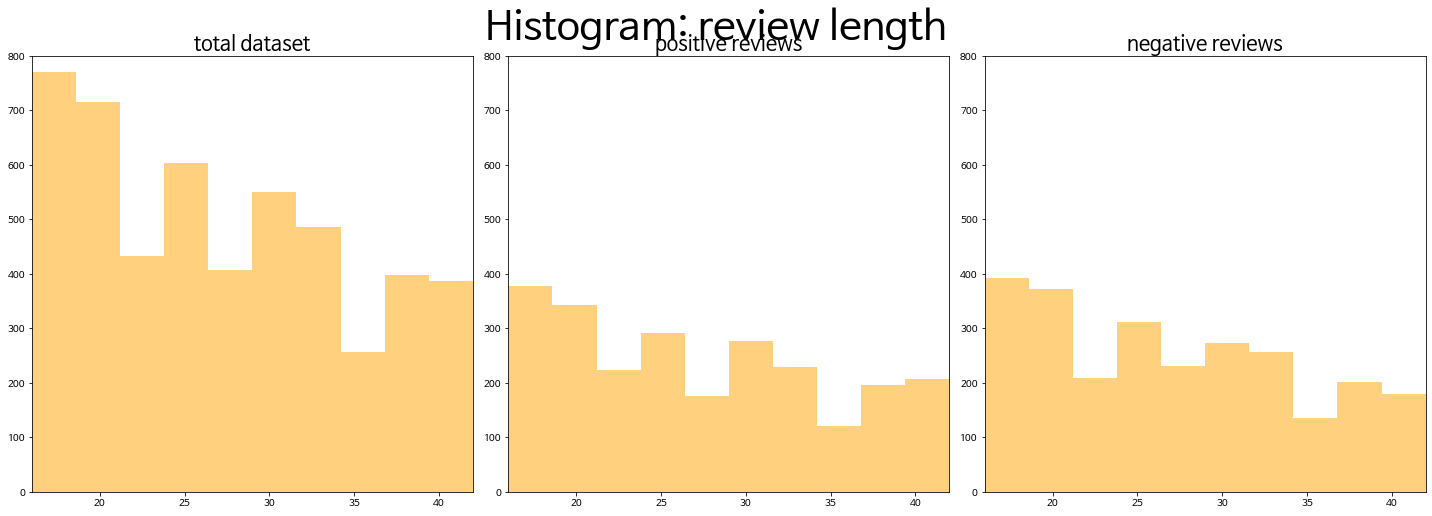

In [11]:
#14 히스토그램을 사용해서 데이터의 분포 확인
plt.figure(figsize=(20,7.5))
plt.suptitle("Histogram: review length", fontsize=40)
name = ['total dataset', 'positive reviews', 'negative reviews'] # 제목으로 사용할 문자열

for i in range(len(compare)):
    document = compare[i]
    string_len = [len(x) for x in document]    
    plt.subplot(1,3,i+1) # 행 개수/ 열 개수/ 해당 그래프 표시 순서
    plt.title(name[i], fontsize=20)
    plt.axis([16, 42, 0, 800])  #x축 시작, 끝 / y축 시작, 끝
    plt.hist(string_len, alpha=0.5, color='orange') # 히스토그램 생성, alpha: 그래프의 투명도 조절
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [12]:
#15 리뷰당 단어수(word) 확인하기 

word_split = data['document'].str.split() # 공백을 기준으로 문자열을 분리
# .stry객체의 문자정보를 추출 
word_split[:5] # 상위 5개 값 확인 , 처음부터 5까지 

0                     [영상이나, 음악이, 이쁘다, 해도, 미화시킨, 불륜일뿐]
1                 [히치콕이, 이, 영화를, 봤다면, 분명, 박수를, 쳤을듯...]
2       [괜찮은, 음악영화가, 또, 나왔군요!!!, 따뜻한, 겨울이, 될, 것, 같아요~]
3                      [아무래도, 20년도지난작품이라, 지금보기는너무유치하다]
4    [지금까지의, 영화들이, 그랬듯., 이, 영화역시, 일본에, 대한, 미화는, 여전하다.]
Name: document, dtype: object

In [13]:
#17 전체 리뷰들을 하나의 문자열로 만듬
def df2str(df):
    
    s = [s for s in df]
    document = ""
    for i in range(len(s)):
        document += s[i]
    return document

#18 명사추출하기 
def get_noun(text):
   
    okt = Okt()
    noun = okt.nouns(text)
    for i,v in enumerate(noun):
        if len(v)<2:
            noun.pop(i)
    count = Counter(noun)
    noun_list = count.most_common(100)

    return noun_list

#19 워드클라우드 이미지 생성하기
def visualize(noun_list, title):
    # 워드클라우드 이미지 생성
    wc= WordCloud(
        font_path = 'a고딕13.ttf',    # 한글폰트 경로 설정
        background_color='white',                             # 배경 색깔 정하기
        colormap = 'Dark2',                                # 폰트 색깔 정하기
        width = 800,
        height = 800).generate_from_frequencies(dict(noun_list)) 
    
    plt.figure(figsize=(10,10)) #이미지 사이즈 지정
    plt.suptitle("Word Cloud", fontsize=40)
    plt.title(title, fontsize=20)
    plt.imshow(wc, interpolation='lanczos') #이미지의 부드럽기 정도
    plt.axis('off') #x y 축 숫자 제거
    plt.show()  # 워드클라우드 이미지 확인
    
    return wc
#20 전체 데이터 워드클라우드 형성.

document = df2str(df_train) # 전체 리뷰들을 하나의 문자열로 만듦
noun_list = get_noun(document) # 명사 추출, 개수 셈
noun_list[:5] # 상위 5개 단어 확인

[('영화', 1501), ('정말', 320), ('진짜', 269), ('최고', 220), ('평점', 185)]

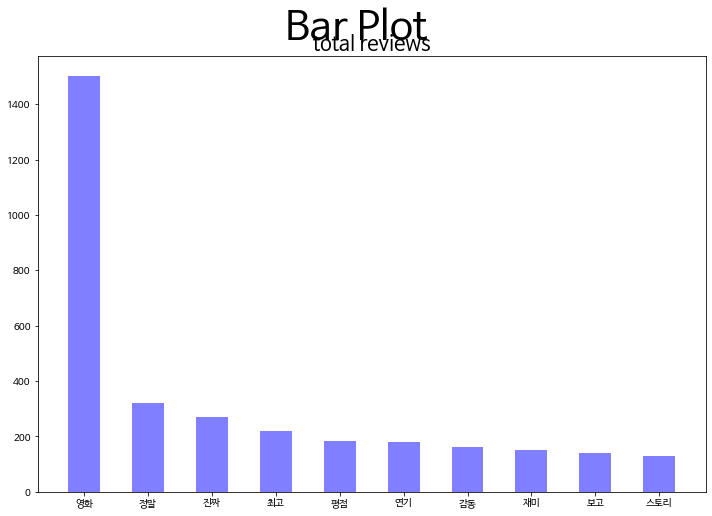

In [14]:
#21 추출한 명사 중 상위 10개 표시하기

top_10 = dict(noun_list[:10]) # 추출한 명사 중 상위 10개
plt.figure(figsize=(10,7.5))
plt.suptitle("Bar Plot", fontsize=40)
plt.title('total reviews', fontsize=20)
plt.bar(top_10.keys(), top_10.values(), width=0.5, color='b', alpha=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [18]:
#22 워드클라우드 시각화
total_reviews = visualize(noun_list, font='NanumBarunGothic','title')

SyntaxError: ignored